In [18]:
from urllib.request import urlretrieve
medical_expense = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_expense, 'medical.csv')
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [21]:
fig_age = px.histogram(medical_df,
                       x='age',
                       marginal='box',
                       nbins = 47,
                       title='Distribution of Age')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [22]:
fig_age = px.histogram(medical_df,
                       x='bmi',
                       marginal='box',
                       color_discrete_sequence=['red'],
                       title='Distribution of BMI')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [23]:
fig_age = px.histogram(medical_df,
                       x='charges',
                       marginal='box',
                       color = 'smoker',
                       color_discrete_sequence=['green', 'grey'],
                       nbins = 47,
                       title='Distribution of Smoker and Non-Smoker')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [24]:
fig_age = px.histogram(medical_df,
                       x='charges',
                       marginal='box',
                       color = 'sex',
                       color_discrete_sequence=['brown', 'grey'],
                       nbins = 47,
                       title='Distribution by Sex')
fig_age.update_layout(bargap=0.1)
fig_age.show()

<BarContainer object of 4 artists>

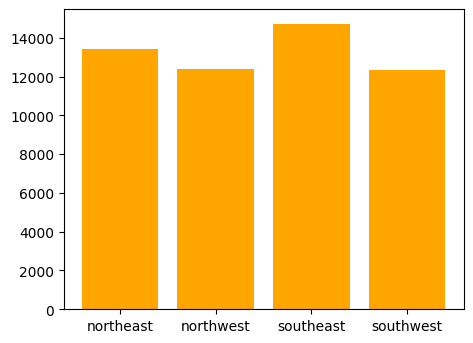

In [25]:
region_df = medical_df.groupby('region').agg({'charges':'mean'}).reset_index()
fig_region = plt.figure(figsize=(4,3))
axes_region = fig_region.add_axes([0,0,1,1])
axes_region.bar(region_df['region'], region_df['charges'], color='orange')

In [26]:
fig_age = px.histogram(medical_df,
                       x='smoker',
                       color = 'sex',
                       color_discrete_sequence=['grey', 'brown'],
                       title='Smoker')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [27]:
fig_age = px.scatter(medical_df,
                       x='age',
                       y='charges',
                       color= 'smoker',
                       opacity = 0.8,
                       hover_data=['sex'],
                       color_discrete_sequence=['green', 'red'],
                       title='Age vs Charges')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [28]:
fig_age = px.scatter(medical_df,
                       x='bmi',
                       y='charges',
                       color= 'smoker',
                       opacity = 0.8,
                       hover_data=['sex'],
                       color_discrete_sequence=['blue', 'orange'],
                       title='BMI vs Charges')
fig_age.update_layout(bargap=0.1)
fig_age.show()

In [29]:
px.violin(medical_df, x='children', y='charges', title='Children vs Charges')

In [30]:
#Correlation
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [31]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['smoker_num'] = smoker_numeric
sex_values = {'male': 1, 'female': 0}
sex_numeric = medical_df.sex.map(sex_values)
medical_df['sex_num'] = sex_numeric
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num,sex_num
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [32]:
medical_df[['age','bmi','children','smoker_num','sex_num','charges']].corr()

,age,bmi,children,smoker_num,sex_num,charges
age,1.000000,0.109272,0.042469,-0.025019,-0.020856,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.046371,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.017163,0.067998
smoker_num,-0.025019,0.003750,0.007673,1.000000,0.076185,0.787251
sex_num,-0.020856,0.046371,0.017163,0.076185,1.000000,0.057292
charges,0.299008,0.198341,0.067998,0.787251,0.057292,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

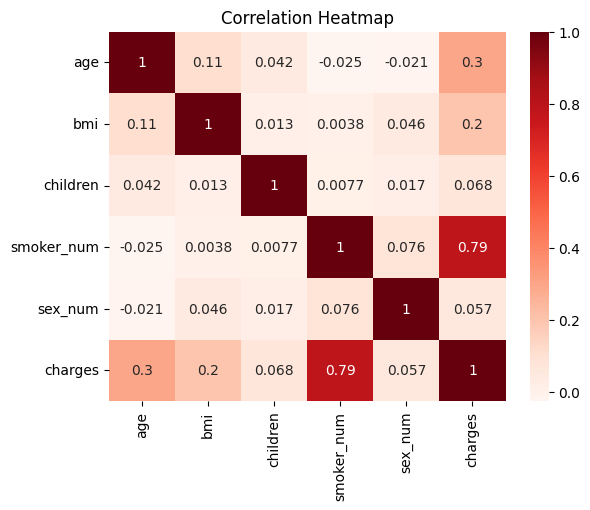

In [33]:
sns.heatmap(medical_df[['age','bmi','children','smoker_num','sex_num','charges']].corr(), cmap='Reds', annot=True)
plt.title('Correlation Heatmap')

In [34]:
#Trend Line - y = wx + b
'''w(slope) = rate of change of y with respect to x
   b(intercept) = value of y when x is 0'''
non_smoker_df = medical_df[medical_df.smoker == 'no']
px.scatter(medical_df, x='age', y='charges', color='sex')